# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('loaded!')

Loading MNIST dataset...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


loaded!


## Part 2: Implement SVD for Dimensionality Reduction

In [9]:
def apply_svd(M):
    # M = X_train.to_numpy()

    VV = np.dot(M.T, M)
    eigen_vals, V = np.linalg.eigh(VV)
    reversed_eigenvalues_indexes = np.argsort(eigen_vals)[::-1]
    eigen_vals = eigen_vals[::-1]

    first_zero = int(np.where(eigen_vals == 0)[0][0])

    eigen_vals = eigen_vals[:first_zero]
    reversed_eigenvalues_indexes = reversed_eigenvalues_indexes[:first_zero]

    V = V[:, reversed_eigenvalues_indexes]
    undiagonalized_S = np.sqrt(eigen_vals)
    
    U = np.dot(M,V) / undiagonalized_S

    # return U
    return U, undiagonalized_S, V.T

def apply_svd_custom(X_train, X_test, n_components):
    def reduce(U, S, n_components):
        return np.dot(U[:, :n_components], np.diag(S[:n_components]))
    
    # train_U, train_S, train_Vh = np.linalg.svd(X_train.to_numpy())
    train_U, train_S, train_Vh = apply_svd(X_train.to_numpy())
    X_train_svd = reduce(train_U, train_S, n_components)

    # test_U, test_S, test_Vh = np.linalg.svd(X_test.to_numpy())
    test_U, test_S, test_Vh = apply_svd(X_test.to_numpy())
    X_test_svd = reduce(test_U, test_S, n_components)

    return X_train_svd, X_test_svd

# print(X_train)
# reduced_X_train, train_Vh, reduced_X_test, test_Vh = apply_svd_custom(X_train, X_test, 0)
# print(reduced_X_train)

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [5*k for k in range(1, 21)] 

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append((n_components, accuracy, training_time))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6537, Training time: 0.4408 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.6997, Training time: 0.7306 seconds
Applying custom SVD with 15 components...
SVD components: 15, Accuracy: 0.5939, Training time: 0.9828 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.5476, Training time: 0.9768 seconds
Applying custom SVD with 25 components...
SVD components: 25, Accuracy: 0.5513, Training time: 2.2865 seconds
Applying custom SVD with 30 components...
SVD components: 30, Accuracy: 0.5486, Training time: 2.8281 seconds
Applying custom SVD with 35 components...
SVD components: 35, Accuracy: 0.5296, Training time: 3.2606 seconds
Applying custom SVD with 40 components...
SVD components: 40, Accuracy: 0.5129, Training time: 4.2221 seconds
Applying custom SVD with 45 components...
SVD components: 45

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


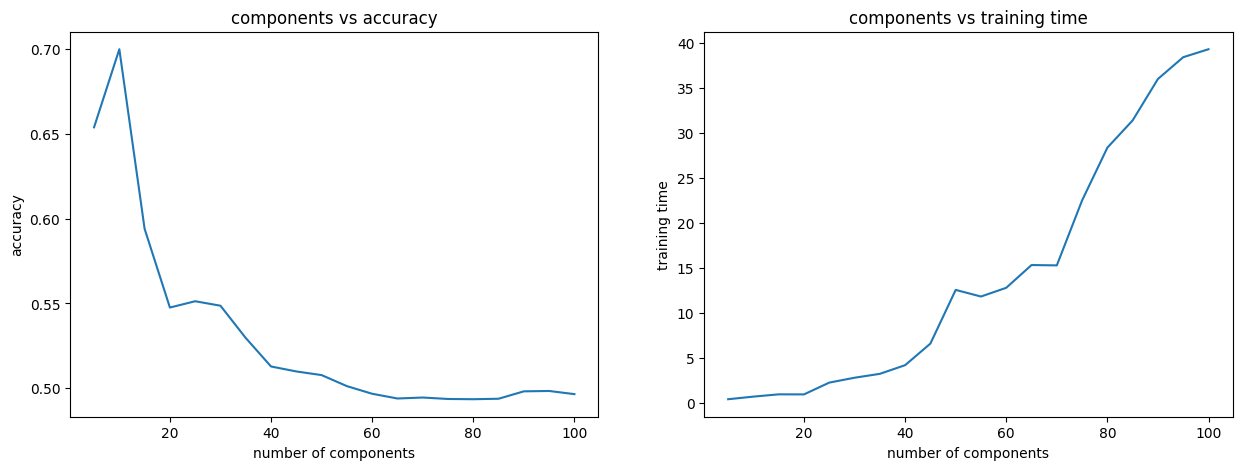

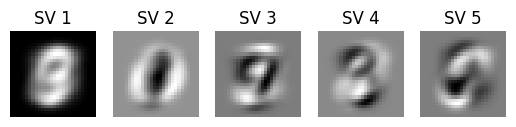

In [11]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

fig, (acc, tt) = plt.subplots(1, 2, figsize=(15, 5))

acc.set_title('components vs accuracy')
acc.set_ylabel('accuracy')
acc.set_xlabel('number of components')
acc.plot([item[0] for item in results], [item[1] for item in results])

tt.set_title('components vs training time')
tt.set_ylabel('training time')
tt.set_xlabel('number of components')
tt.plot([item[0] for item in results], [item[2] for item in results])

plt.show()

test_U, test_S, test_Vh = apply_svd(X_test.to_numpy())

top_5_singular_vectors = test_Vh[:5]

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(top_5_singular_vectors[i].reshape((28,28)), cmap='gray')
  plt.title(f'SV {i + 1}')
  plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

Using 10 components seems to produce the highest accuracy. It would appear that any more just seems to add unncessary noise and adds training time without improving accuracy(in fact, it hurts accuracy). After roughly 40 components, the 